
# Multi Layer Perceptron


In [1]:
import numpy as np


In [2]:
# set seed for reproducibility
seed_val = 9000
np.random.seed(seed_val)

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print('Size of the training_set: ', X_train.shape)
print('Size of the test_set: ', X_test.shape)
print('Shape of each image: ', X_train[0].shape)
print('Total number of classes: ', len(np.unique(y_train)))
print('Unique class labels: ', np.unique(y_train))

Size of the training_set:  (60000, 28, 28)
Size of the test_set:  (10000, 28, 28)
Shape of each image:  (28, 28)
Total number of classes:  10
Unique class labels:  [0 1 2 3 4 5 6 7 8 9]


In [6]:
import matplotlib.pyplot as plt
# Plot of 9 random images
for i in range(0, 9):
    plt.subplot(331+i) # plot of 3 rows and 3 columns
    plt.axis('off') # turn off axis
    plt.imshow(X_train[i], cmap='OrRd') # gray scale

In [7]:
print('Maximum pixel value in the training_set: ', np.max(X_train))
print('Minimum pixel value in the training_set: ', np.min(X_train))

Maximum pixel value in the training_set:  255
Minimum pixel value in the training_set:  0


In [8]:
!pip install keras

In [9]:
# Number of epochs
epochs = 15

# Batchsize
batch_size = 128

# Optimizer for the generator
from keras.optimizers import Adam
optimizer = Adam(lr=0.0001)

# Shape of the input image
input_shape = (28,28,1)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
from keras.models import Sequential
model = Sequential()

In [11]:
from keras.layers import Dense

In [12]:
model.add(Dense(300, input_shape=(784,), activation = 'relu'))

In [13]:
model.add(Dense(300,  activation='relu'))

In [14]:
model.add(Dense(10,  activation='softmax'))

In [15]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer , metrics = ['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.08333, random_state=42)

X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print('Training Examples', X_train.shape[0])
print('Validation Examples', X_val.shape[0])
print('Test Examples', X_test.shape[0])

Training Examples 55000
Validation Examples 5000
Test Examples 10000


In [18]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val)) 

Instructions for updating:
Use tf.cast instead.
Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 9s 170us/step - loss: 7.4944 - acc: 0.5261 - val_loss: 6.7615 - val_acc: 0.5732
Epoch 2/15
55000/55000 [==============================] - 8s 143us/step - loss: 6.0105 - acc: 0.6204 - val_loss: 5.3929 - val_acc: 0.6588
Epoch 3/15
55000/55000 [==============================] - 10s 173us/step - loss: 5.2641 - acc: 0.6681 - val_loss: 5.2742 - val_acc: 0.6674
Epoch 4/15
55000/55000 [==============================] - 9s 155us/step - loss: 5.1652 - acc: 0.6757 - val_loss: 5.2635 - val_acc: 0.6688
Epoch 5/15
55000/55000 [==============================] - 8s 146us/step - loss: 5.1256 - acc: 0.6787 - val_loss: 5.2042 - val_acc: 0.6726
Epoch 6/15
55000/55000 [==============================] - 8s 141us/step - loss: 3.9937 - acc: 0.7457 - val_loss: 3.8242 - val_acc: 0.7554
Epoch 7/15
55000/55000 [==============================] - 5s 95us/step - l

In [19]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 0s 41us/step
Test loss: 1.9902316490173326
Accuracy: 0.8698


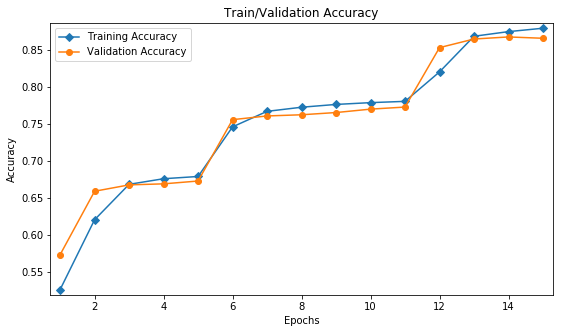

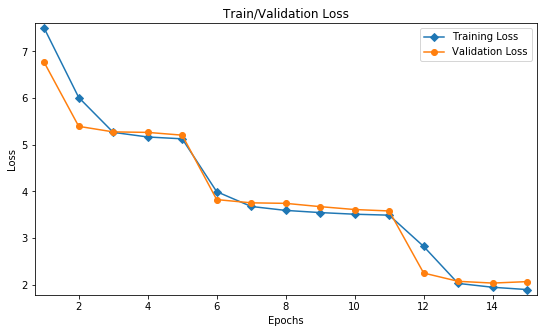

In [20]:
import matplotlib.pyplot as plt

def loss_plot(history):
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']

    plt.figure(figsize=(9,5))
    plt.plot(np.arange(1,len(train_acc)+1),train_acc,  marker = 'D', label = 'Training Accuracy')
    plt.plot(np.arange(1,len(train_acc)+1),val_acc,  marker = 'o', label = 'Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train/Validation Accuracy')
    plt.legend()
    plt.margins(0.02)
    plt.show()

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(9,5))
    plt.plot(np.arange(1,len(train_acc)+1),train_loss, marker = 'D', label = 'Training Loss')
    plt.plot(np.arange(1,len(train_acc)+1),val_loss, marker = 'o', label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train/Validation Loss')
    plt.legend()
    plt.margins(0.02)
    plt.show()
    
loss_plot(history)

# Convolution


In [21]:
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
kernel = np.array([-1, 1, 0])

# empty feature map
conv_result = np.zeros(array.shape[0] - kernel.shape[0] +1).astype(int)

for i in range(array.shape[0] - kernel.shape[0] +1):
    # convolving
    conv_result[i] = (kernel * array[i:i+3]).sum()
    print(kernel, '*', array[i:i+3], '=', conv_result[i])
    
print('Feature Map :', conv_result)

[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
Feature Map : [ 1 -1  1 -1  1 -1  1 -1]


In [22]:
from keras.layers import Conv2D

In [23]:
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

print('Train data shape:', X_train.shape)
print('Val data shape:', X_val.shape)
print('Test data shape:', X_test.shape)

Train data shape: (55000, 28, 28, 1)
Val data shape: (5000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))

In [26]:
from keras.layers import Flatten
model.add(Flatten())

In [27]:
model.add(Dense(128, activation = 'relu'))

In [28]:
model.add(Dense(10, activation = 'softmax'))

In [29]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 139s 3ms/step - loss: 13.0529 - acc: 0.1898 - val_loss: 13.0417 - val_acc: 0.1906
Epoch 2/15
55000/55000 [==============================] - 130s 2ms/step - loss: 13.0189 - acc: 0.1922 - val_loss: 13.0170 - val_acc: 0.1924
Epoch 3/15
55000/55000 [==============================] - 139s 3ms/step - loss: 13.0140 - acc: 0.1925 - val_loss: 13.0776 - val_acc: 0.1884
Epoch 4/15
55000/55000 [==============================] - 135s 2ms/step - loss: 13.0078 - acc: 0.1929 - val_loss: 13.0159 - val_acc: 0.1924
Epoch 5/15
55000/55000 [==============================] - 136s 2ms/step - loss: 13.0005 - acc: 0.1934 - val_loss: 13.0363 - val_acc: 0.1912
Epoch 6/15
55000/55000 [==============================] - 134s 2ms/step - loss: 13.0060 - acc: 0.1930 - val_loss: 13.0090 - val_acc: 0.1926
Epoch 7/15
55000/55000 [==============================] - 125s 2ms/step - loss: 13.0077 - acc: 0.1929 - val_los

In [31]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)
#increase epochs to improve accuracy


10000/10000 [==============================] - 8s 753us/step
Test loss: 13.037927514648437
Accuracy: 0.1911


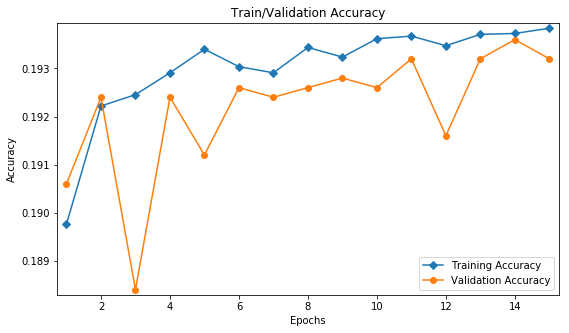

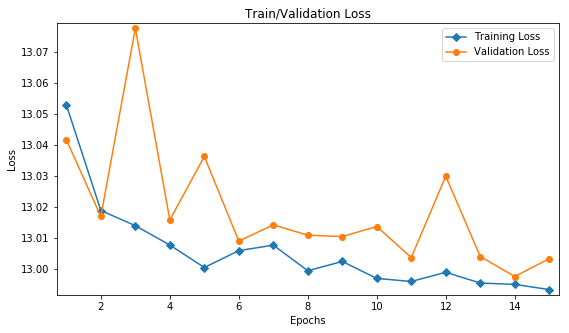

In [32]:
loss_plot(history)

# Pooling


In [33]:
#import numpy as np
#array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
#result = np.zeros(len(array)//2)
#for i in range(len(array)//2):
#    result[i] = np.max(array[2*i:2*i+2])
#result

In [34]:
#array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
#result = np.zeros(len(array)//2)
#for i in range(len(array)//2):
#    result[i] = np.mean(array[2*i:2*i+2])
#result

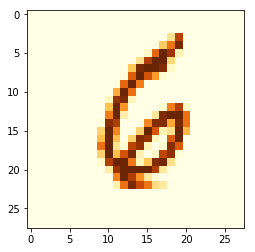

In [35]:
plt.imshow(X_train[0].reshape(28,28), cmap='YlOrBr')

In [36]:
def square_max_pool(image, pool_size=2):
    result = np.zeros((14,14))
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i,j] = np.max(image[i*pool_size : i*pool_size+pool_size, j*pool_size : j*pool_size+pool_size])
            
    return result

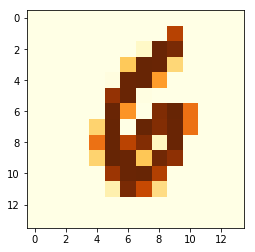

In [37]:
plt.imshow(square_max_pool(X_train[0].reshape(28,28)), cmap='YlOrBr')

In [38]:
from keras.layers import MaxPool2D

In [39]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 87s 2ms/step - loss: 7.2719 - acc: 0.5418 - val_loss: 6.9770 - val_acc: 0.5620
Epoch 2/15
55000/55000 [==============================] - 83s 2ms/step - loss: 6.8615 - acc: 0.5704 - val_loss: 6.8483 - val_acc: 0.5702
Epoch 3/15
55000/55000 [==============================] - 80s 1ms/step - loss: 4.4442 - acc: 0.7125 - val_loss: 2.1597 - val_acc: 0.8516
Epoch 4/15
55000/55000 [==============================] - 81s 1ms/step - loss: 2.0043 - acc: 0.8646 - val_loss: 1.9425 - val_acc: 0.8674
Epoch 5/15
55000/55000 [==============================] - 80s 1ms/step - loss: 1.5936 - acc: 0.8898 - val_loss: 0.3523 - val_acc: 0.9608
Epoch 6/15
55000/55000 [==============================] - 83s 2ms/step - loss: 0.2008 - acc: 0.9758 - val_loss: 0.2097 - val_acc: 0.9722
Epoch 7/15
55000/55000 [==============================] - 82s 1ms/step - loss: 0.1266 - acc: 0.9827 - val_loss: 0.1831 - val_acc:

In [41]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 5s 501us/step
Test loss: 0.11709352134762448
Accuracy: 0.9807


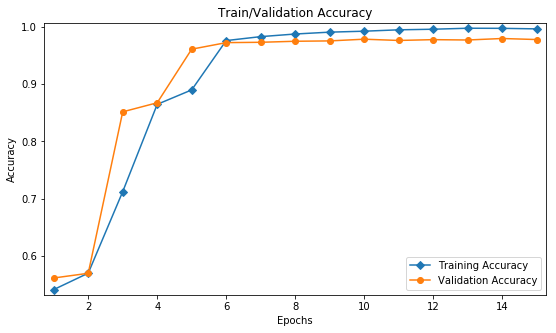

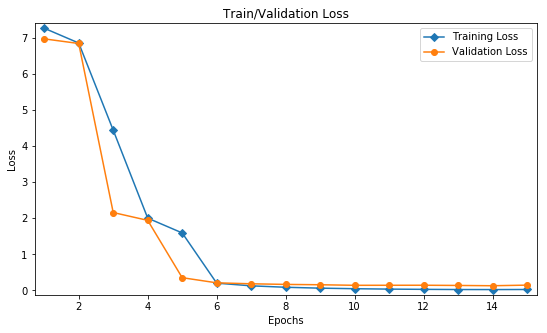

In [42]:
loss_plot(history)

# Dropout

In [43]:
#Dropout is a regularization technique used to prevent overfitting
from keras.layers import Dropout

In [44]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

In [45]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 91s 2ms/step - loss: 6.7158 - acc: 0.5709 - val_loss: 3.7878 - val_acc: 0.7506
Epoch 2/15
55000/55000 [==============================] - 91s 2ms/step - loss: 1.3513 - acc: 0.8529 - val_loss: 0.2676 - val_acc: 0.9402
Epoch 3/15
55000/55000 [==============================] - 91s 2ms/step - loss: 0.2927 - acc: 0.9278 - val_loss: 0.1578 - val_acc: 0.9594
Epoch 4/15
55000/55000 [==============================] - 91s 2ms/step - loss: 0.1970 - acc: 0.9466 - val_loss: 0.1284 - val_acc: 0.9662
Epoch 5/15
55000/55000 [==============================] - 91s 2ms/step - loss: 0.1530 - acc: 0.9576 - val_loss: 0.1126 - val_acc: 0.9726
Epoch 6/15
55000/55000 [==============================] - 93s 2ms/step - loss: 0.1232 - acc: 0.9649 - val_loss: 0.1029 - val_acc: 0.9748
Epoch 7/15
55000/55000 [==============================] - 92s 2ms/step - loss: 0.1037 - acc: 0.9693 - val_loss: 0.0926 - val_acc:

In [46]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 5s 529us/step
Test loss: 0.0692395639334125
Accuracy: 0.9822


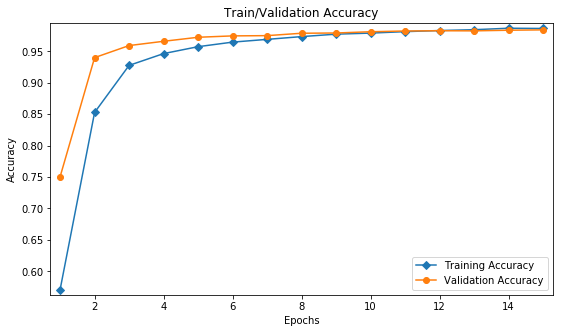

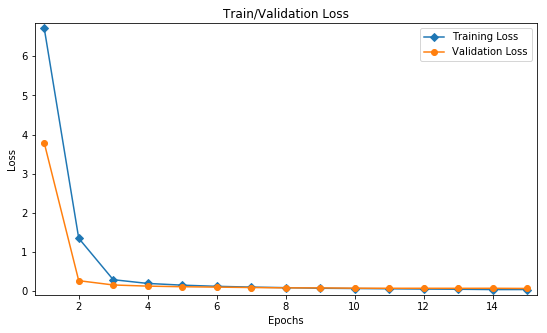

In [47]:
loss_plot(history)

# Deeper Convolution

In the above models  there was a slight amount of overfitting on the train data.
Let's build a deeper model to see if we can create a classifier that is more accurate than the
other models we have trained so far, and see if we can get it to reach an even better minima. We will build a deeper model by adding two more convolution layers to our best model so
far:

In [48]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [49]:
history = model.fit(X_train, y_train, epochs = 15, batch_size=128, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 170s 3ms/step - loss: 2.6510 - acc: 0.5615 - val_loss: 0.4114 - val_acc: 0.8982
Epoch 2/15
55000/55000 [==============================] - 168s 3ms/step - loss: 0.6456 - acc: 0.7988 - val_loss: 0.2553 - val_acc: 0.9338
Epoch 3/15
55000/55000 [==============================] - 166s 3ms/step - loss: 0.4513 - acc: 0.8623 - val_loss: 0.1958 - val_acc: 0.9476
Epoch 4/15
55000/55000 [==============================] - 164s 3ms/step - loss: 0.3587 - acc: 0.8893 - val_loss: 0.1573 - val_acc: 0.9540
Epoch 5/15
55000/55000 [==============================] - 162s 3ms/step - loss: 0.2933 - acc: 0.9101 - val_loss: 0.1331 - val_acc: 0.9594
Epoch 6/15
55000/55000 [==============================] - 163s 3ms/step - loss: 0.2583 - acc: 0.9216 - val_loss: 0.1161 - val_acc: 0.9638
Epoch 7/15
55000/55000 [==============================] - 166s 3ms/step - loss: 0.2208 - acc: 0.9333 - val_loss: 0.1038 - v

In [50]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 8s 791us/step
Test loss: 0.056585624753549925
Accuracy: 0.9837


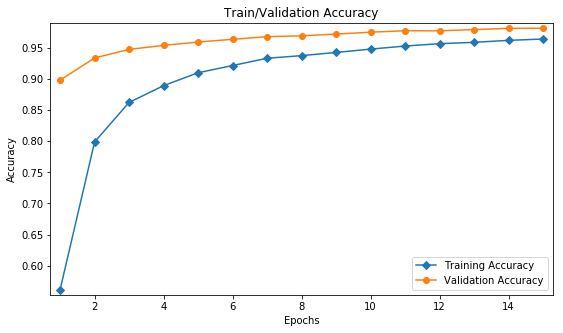

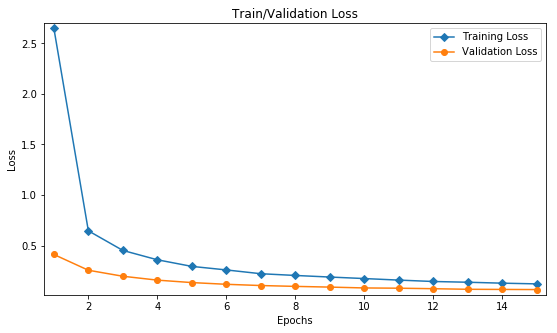

In [51]:
loss_plot(history)

In [52]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [53]:
history = model.fit(X_train, y_train, epochs = 40, batch_size=128, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 170s 3ms/step - loss: 3.6719 - acc: 0.5421 - val_loss: 0.4403 - val_acc: 0.8772
Epoch 2/40
55000/55000 [==============================] - 168s 3ms/step - loss: 0.7007 - acc: 0.7845 - val_loss: 0.2779 - val_acc: 0.9192
Epoch 3/40
55000/55000 [==============================] - 170s 3ms/step - loss: 0.4918 - acc: 0.8506 - val_loss: 0.2055 - val_acc: 0.9410
Epoch 4/40
55000/55000 [==============================] - 168s 3ms/step - loss: 0.3961 - acc: 0.8796 - val_loss: 0.1674 - val_acc: 0.9478
Epoch 5/40
55000/55000 [==============================] - 169s 3ms/step - loss: 0.3308 - acc: 0.9000 - val_loss: 0.1487 - val_acc: 0.9564
Epoch 6/40
55000/55000 [==============================] - 170s 3ms/step - loss: 0.2913 - acc: 0.9136 - val_loss: 0.1293 - val_acc: 0.9610
Epoch 7/40
55000/55000 [==============================] - 168s 3ms/step - loss: 0.2483 - acc: 0.9252 - val_loss: 0.1149 - v

In [54]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 8s 830us/step
Test loss: 0.037315198969555784
Accuracy: 0.9894


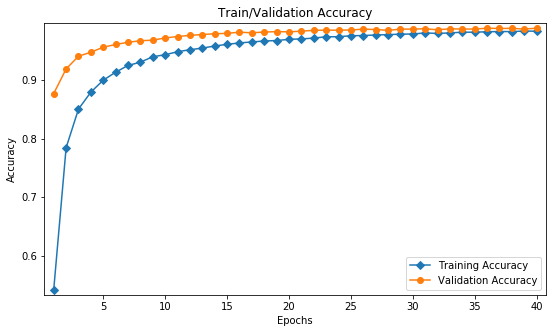

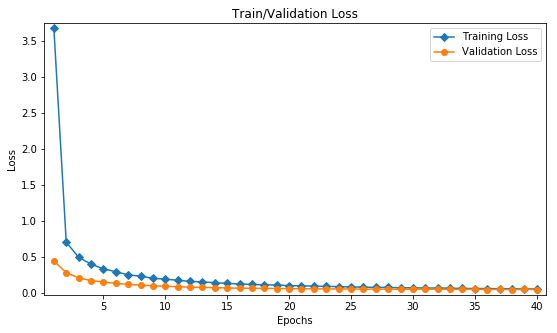

In [55]:
loss_plot(history)

##Data Augmentation

Keras provides a preprocessing utility called that can be used to ImageDataGenerator augment image data with simple configuration.

ImageDataGenerator can - 
zoom_range: Randomly zoom in on images to a given zoom level
horizontal_flip: Randomly flip images horizontally
vertical_flip: Randomly flip images vertically
rescale: Multiply the data with the factor provided

In [56]:
from keras.preprocessing.image import ImageDataGenerator

In [57]:
train_datagen = ImageDataGenerator(horizontal_flip=True)

In [58]:
# fit the augmentor
train_datagen.fit(X_train)

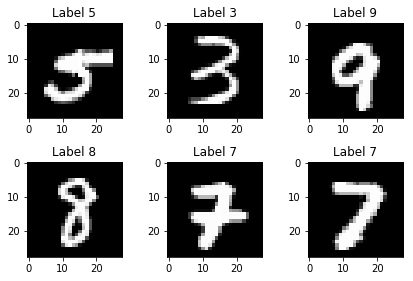

In [59]:
# transform the data
for img, label in train_datagen.flow(X_train, y_train, batch_size=6):
    for i in range(0, 6):
        plt.subplot(2,3,i+1)
        plt.title('Label {}'.format(label[i]))
        plt.imshow(img[i].reshape(28, 28), cmap='gray')
    break
plt.tight_layout()
plt.show()

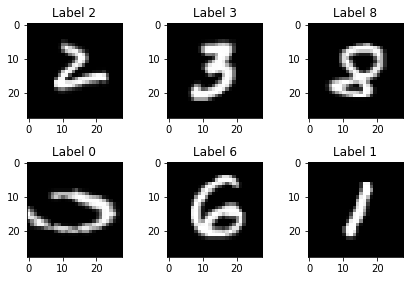

In [60]:
train_datagen = ImageDataGenerator(zoom_range=0.3)
#fit
train_datagen.fit(X_train)

#transform
for img, label in train_datagen.flow(X_train, y_train, batch_size=6):
    for i in range(0, 6):
        plt.subplot(2,3,i+1)
        plt.title('Label {}'.format(label[i]))
        plt.imshow(img[i].reshape(28, 28), cmap='gray')
    break
plt.tight_layout()
plt.show()

In [61]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True)

In [62]:
train_datagen.fit(X_train)

In [63]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= Adam(lr=0.001), metrics = ['accuracy'])

In [64]:
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=128),
                    steps_per_epoch=len(X_train) / 128, epochs=10,
                    validation_data=(train_datagen.flow(X_val, y_val)))

ValueError: `validation_steps=None` is only valid for a generator based on the `keras.utils.Sequence` class. Please specify `validation_steps` or use the `keras.utils.Sequence` class.

In [ ]:
for test_img, test_lab in train_datagen.flow(X_test, y_test, batch_size = X_test.shape[0]):
    break

loss,acc = model.evaluate(test_img, test_lab)
print('Test loss:', loss)
print('Accuracy:', acc)